# Introduction and Background

### Research Question

The aim of our project is to find trends between different injuries and fatalities caused by car accidents. We want to learn if car accidents are more prone with certain age groups, models of cars, or a certain geographical area. 

### Overview

To answer our research question, we will only be focusing on injuries and fatalities that have occured in the United States. We were able to find several datasets providing detailed information of the occurences injuries/fatalities. ALthough there were datasets that had global information, we thought that it be easier to analyze our results if only looking at the United States. Partly because we are more familiar with how navigating a vehicle works in the United States. 

We decided to analyze car accidents within the time frame __ . We think that no matter what time fram we decide to analyze, our end results should ultimately reflect the averages of car accidents in any given year. 

### Hypothesis

We believe that there are trends between differet injuries/fatalies caused by car accidents. In particular, we believe that the types of cars involve in the car accident does influence the outcome. In addition, we believe that certain age groups are more prone to be in car accidents than others. We hope to answer these hyphothesis as well as uncover other trends in our data sets.

### Background

Automobiles are a great tool that we all used in our daily lives to get around, yet automobiles form a large portion of the fatalites and injuries in the United States. In our project, we want to examine fatalities and injuries caused by motor vehicles to see the similarites that exist. Most car accidents do go reported and the data collected is very detailed. For example, the make and model of the car, age of driver, severity of accident, etc for the most part are collected.



### Datasets

### Data Gathering, Wrangling, and Cleaning

In [713]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [799]:

df_acc = pd.read_csv('ACCIDENT.csv')
df_per = pd.read_csv('PERSON.csv')

In [715]:
df_acc.head(5)

,STATE,ST_CASE,VE_TOTAL,VE_FORMS,PVH_INVL,PEDS,PERNOTMVIT,PERMVIT,PERSONS,COUNTY,...,NOT_MIN,ARR_HOUR,ARR_MIN,HOSP_HR,HOSP_MN,CF1,CF2,CF3,FATALS,DRUNK_DR
0,1,10001,2,1,1,0,0,1,1,121,...,99,6,15,88,88,0,0,0,1,0
1,1,10002,1,1,0,0,0,2,2,127,...,99,0,59,88,88,20,0,0,2,0
2,1,10003,2,2,0,0,0,2,2,21,...,99,23,10,99,99,0,0,0,1,0
3,1,10004,1,1,0,0,0,2,2,3,...,99,13,14,88,88,0,0,0,1,0
4,1,10005,2,2,0,0,0,2,2,73,...,99,7,28,88,88,0,0,0,1,0


In [716]:

df_acc.columns

Index(['STATE', 'ST_CASE', 'VE_TOTAL', 'VE_FORMS', 'PVH_INVL', 'PEDS',
       'PERNOTMVIT', 'PERMVIT', 'PERSONS', 'COUNTY', 'CITY', 'DAY', 'MONTH',
       'YEAR', 'DAY_WEEK', 'HOUR', 'MINUTE', 'NHS', 'RUR_URB', 'FUNC_SYS',
       'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE',
       'LONGITUD', 'SP_JUR', 'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2',
       'TYP_INT', 'WRK_ZONE', 'REL_ROAD', 'LGT_COND', 'WEATHER1', 'WEATHER2',
       'WEATHER', 'SCH_BUS', 'RAIL', 'NOT_HOUR', 'NOT_MIN', 'ARR_HOUR',
       'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3', 'FATALS',
       'DRUNK_DR'],
      dtype='object')

In [717]:
df_acc['CF2'].value_counts()

0     33128
99      322
23       64
19       40
27       23
14       22
15       22
20       11
28        7
26        4
22        2
5         2
4         2
3         2
18        1
6         1
2         1
Name: CF2, dtype: int64

In [718]:
df_acc=df_acc.drop(columns=['STATE', 'VE_FORMS', 'PVH_INVL','PERMVIT', 'PERNOTMVIT', 'COUNTY','CITY', 'DAY', 'MONTH', 'YEAR', 'DAY_WEEK', 'MINUTE', 
                            'NHS', 'RUR_URB', 'FUNC_SYS', 'RD_OWNER', 'ROUTE', 'TWAY_ID', 'TWAY_ID2', 'MILEPT', 'LATITUDE', 'LONGITUD', 'SP_JUR',
                            'HARM_EV', 'MAN_COLL', 'RELJCT1', 'RELJCT2','TYP_INT', 'WEATHER1', 'WEATHER2', 'RAIL', 'NOT_HOUR','NOT_MIN', "ARR_HOUR",
                            'ARR_MIN', 'HOSP_HR', 'HOSP_MN', 'CF1', 'CF2', 'CF3'])
df_acc
                    

,ST_CASE,VE_TOTAL,PEDS,PERSONS,HOUR,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,SCH_BUS,FATALS,DRUNK_DR
0,10001,2,0,1,6,0,2,4,1,0,1,0
1,10002,1,0,2,0,0,3,2,2,0,2,0
2,10003,2,0,2,22,1,4,2,10,0,1,0
3,10004,1,0,2,13,0,4,1,10,0,1,0
4,10005,2,0,2,7,0,1,1,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
33649,560097,1,0,1,2,0,6,2,1,0,1,1
33650,560098,2,0,2,10,0,1,1,3,0,1,0
33651,560099,1,0,1,18,0,3,2,11,0,1,0
33652,560100,1,0,2,13,0,4,1,1,0,1,1


In [719]:
df_per.head(5)

,STATE,ST_CASE,VE_FORMS,VEH_NO,PER_NO,STR_VEH,COUNTY,DAY,MONTH,HOUR,...,DEATH_TM,LAG_HRS,LAG_MINS,P_SF1,P_SF2,P_SF3,WORK_INJ,HISPANIC,RACE,LOCATION
0,1,10001,1,1,1,0,121,5,1,6,...,600,0,0,0,0,0,1,7,2,0
1,1,10002,1,1,1,0,127,8,1,0,...,48,0,0,0,0,0,0,7,2,0
2,1,10002,1,1,2,0,127,8,1,0,...,48,0,0,0,0,0,0,7,2,0
3,1,10003,2,1,1,0,21,8,1,22,...,2250,0,0,0,0,0,0,7,1,0
4,1,10003,2,2,1,0,21,8,1,22,...,8888,999,99,0,0,0,8,0,0,0


In [720]:

df_per.columns

Index(['STATE', 'ST_CASE', 'VE_FORMS', 'VEH_NO', 'PER_NO', 'STR_VEH', 'COUNTY',
       'DAY', 'MONTH', 'HOUR', 'MINUTE', 'RUR_URB', 'FUNC_SYS', 'HARM_EV',
       'MAN_COLL', 'SCH_BUS', 'MAKE', 'MAK_MOD', 'BODY_TYP', 'MOD_YEAR',
       'TOW_VEH', 'SPEC_USE', 'EMER_USE', 'ROLLOVER', 'IMPACT1', 'FIRE_EXP',
       'AGE', 'SEX', 'PER_TYP', 'INJ_SEV', 'SEAT_POS', 'REST_USE', 'REST_MIS',
       'AIR_BAG', 'EJECTION', 'EJ_PATH', 'EXTRICAT', 'DRINKING', 'ALC_DET',
       'ALC_STATUS', 'ATST_TYP', 'ALC_RES', 'DRUGS', 'DRUG_DET', 'DSTATUS',
       'HOSPITAL', 'DOA', 'DEATH_DA', 'DEATH_MO', 'DEATH_YR', 'DEATH_HR',
       'DEATH_MN', 'DEATH_TM', 'LAG_HRS', 'LAG_MINS', 'P_SF1', 'P_SF2',
       'P_SF3', 'WORK_INJ', 'HISPANIC', 'RACE', 'LOCATION'],
      dtype='object')

In [721]:
df_per['MAKE'].value_counts()

12.0    11002
20.0    10655
49.0     6745
37.0     5361
7.0      4953
        ...  
10.0        4
74.0        3
43.0        2
64.0        1
25.0        1
Name: MAKE, Length: 67, dtype: int64

In [722]:
df_per=df_per.drop(columns=['STATE','SCH_BUS', 'VE_FORMS', 'STR_VEH', 'COUNTY', 'DAY', 'MONTH', 'MINUTE', 'RUR_URB', 'FUNC_SYS',
                            'HARM_EV', 'MAN_COLL', 'TOW_VEH', 'SPEC_USE', 'EMER_USE', 'ROLLOVER',
                            'IMPACT1', 'FIRE_EXP',  'PER_TYP', 'SEAT_POS', 'REST_MIS', 'AIR_BAG',
                            'EJ_PATH', 'EXTRICAT', 'ALC_STATUS','ATST_TYP', 'ALC_RES', 'DSTATUS', 'HOSPITAL', 'DOA', 'DEATH_DA',
                            'DEATH_MO', 'DEATH_YR', 'DEATH_HR', 'DEATH_MN', 'DEATH_TM', 'LAG_HRS', 'LAG_MINS','P_SF1', 'P_SF2',
                            'P_SF3', 'WORK_INJ', 'HISPANIC', 'RACE', 'LOCATION'])
df_per.head()
                            

,ST_CASE,VEH_NO,PER_NO,HOUR,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,AGE,SEX,INJ_SEV,REST_USE,EJECTION,DRINKING,ALC_DET,DRUGS,DRUG_DET
0,10001,1,1,6,82.0,82881.0,66.0,2018.0,55,1,4,20,2,0,9,0,8
1,10002,1,1,0,58.0,58037.0,4.0,9999.0,24,1,4,20,1,9,9,9,8
2,10002,1,2,0,58.0,58037.0,4.0,9999.0,24,1,4,3,0,8,9,8,8
3,10003,1,1,22,63.0,63402.0,14.0,2008.0,37,2,4,20,0,0,9,9,8
4,10003,2,1,22,7.0,7881.0,61.0,2001.0,36,1,2,20,0,0,9,0,8


In [803]:
COLOR_MAP = {0 : '#461969ff',
            1 : '#45337dff',
            2 : '#3c4f8aff',
            3 : '#33638dff',
            4 : '#29788eff',
            5 : '#25a186ff',
            6 : '#35b479ff',
            7 : '#5cc863ff',
            8 : '#c3df2eff',
            9 : '#fde725ff'
           }

In [802]:
df_per.INJ_SEV.unique()

array([4, 2, 0, 3, 1, 9, 5, 6], dtype=int64)

In [801]:
inj_str = ['No Apparent Injury', 'Possible Injury', 'Suspected Minor Injury', 
        'Suspected Serious Injury', 'Fatal Injury', 'Injured, Severity Unknown', 
        'Died Prior to Crash', '','','Unknown']
#for i in range(0,10):
#    if injury = i:
#        injury = inj_str(i)

In [800]:
def change_inj(injury):
    for i in range(0,10):
        if injury == i:
            injury = inj_str[i]
    return injury

In [804]:
df_per['INJ_lvl'] = df_per.INJ_SEV.apply(change_inj)

Plotting Injury severity across all cases and people

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  after removing the cwd from sys.path.


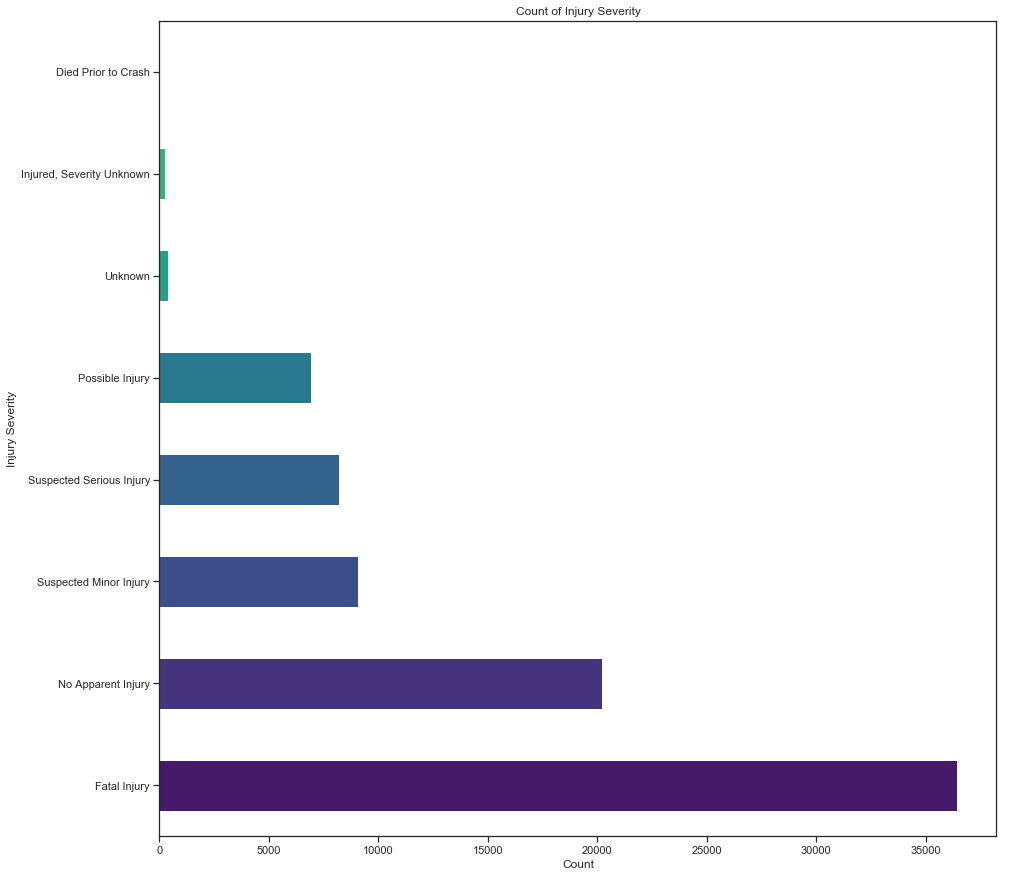

In [821]:
inj_counts = df_per.INJ_lvl.value_counts()
color1 = [COLOR_MAP[l] for l in range(len(inj_counts))]
fig, ax = plt.subplots(figsize=(15,15))
inj_counts.plot('barh', color = color1)
plt.xlabel('Count')
plt.ylabel('Injury Severity')
plt.title('Count of Injury Severity')
plt.savefig('Plots/inj_severity.png')
plt.show()

Merging person and accident datasets on ST_CASE as index

In [729]:
df = df_acc.merge(df_per)
df.head(5)

,ST_CASE,VE_TOTAL,PEDS,PERSONS,HOUR,WRK_ZONE,REL_ROAD,LGT_COND,WEATHER,SCH_BUS,...,AGE,SEX,INJ_SEV,REST_USE,EJECTION,DRINKING,ALC_DET,DRUGS,DRUG_DET,INJ_lvl
0,10001,2,0,1,6,0,2,4,1,0,...,55,1,4,20,2,0,9,0,8,Fatal Injury
1,10002,1,0,2,0,0,3,2,2,0,...,24,1,4,20,1,9,9,9,8,Fatal Injury
2,10002,1,0,2,0,0,3,2,2,0,...,24,1,4,3,0,8,9,8,8,Fatal Injury
3,10003,2,0,2,22,1,4,2,10,0,...,37,2,4,20,0,0,9,9,8,Fatal Injury
4,10003,2,0,2,22,1,4,2,10,0,...,36,1,2,20,0,0,9,0,8,Suspected Minor Injury


In [806]:
df_per = df_per[df_per.AGE <= 99]

In [807]:
bins = np.append(np.arange(0,90,5), [90,99])
df_per['age_bins'] = pd.cut(x=df_per.AGE, bins=bins)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


Removing unreported sex data

In [808]:
df_per.SEX.value_counts()

1    53870
2    27603
8       60
9       11
Name: SEX, dtype: int64

In [810]:
df_per = df_per[df_per.SEX <= 3]

In [778]:
x_female

(90, 99]     144
(85, 90]     336
(80, 85]     598
(75, 80]     799
(70, 75]     959
(65, 70]    1175
(60, 65]    1395
(55, 60]    1632
(50, 55]    1614
(45, 50]    1691
(40, 45]    1640
(35, 40]    1866
(30, 35]    2090
(25, 30]    2534
(20, 25]    2904
(15, 20]    3017
(10, 15]    1149
(5, 10]      958
(0, 5]       950
Name: age_bins, dtype: int64

(90, 99]     348
(85, 90]     836
(80, 85]    1378
(75, 80]    1957
(70, 75]    2630
(65, 70]    3324
(60, 65]    4426
(55, 60]    5507
(50, 55]    5557
(45, 50]    5668
(40, 45]    5320
(35, 40]    6037
(30, 35]    6774
(25, 30]    8101
(20, 25]    9201
(15, 20]    7816
(10, 15]    2429
(5, 10]     1902
(0, 5]      1955
Name: age_bins, dtype: int64

In [816]:
x_male

(90, 99]     204
(85, 90]     500
(80, 85]     780
(75, 80]    1158
(70, 75]    1671
(65, 70]    2149
(60, 65]    3031
(55, 60]    3875
(50, 55]    3943
(45, 50]    3977
(40, 45]    3680
(35, 40]    4171
(30, 35]    4684
(25, 30]    5567
(20, 25]    6297
(15, 20]    4799
(10, 15]    1280
(5, 10]      944
(0, 5]      1005
Name: age_bins, dtype: int64

Histogram of the ages involved in all 2018 accidents

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:7: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  import sys


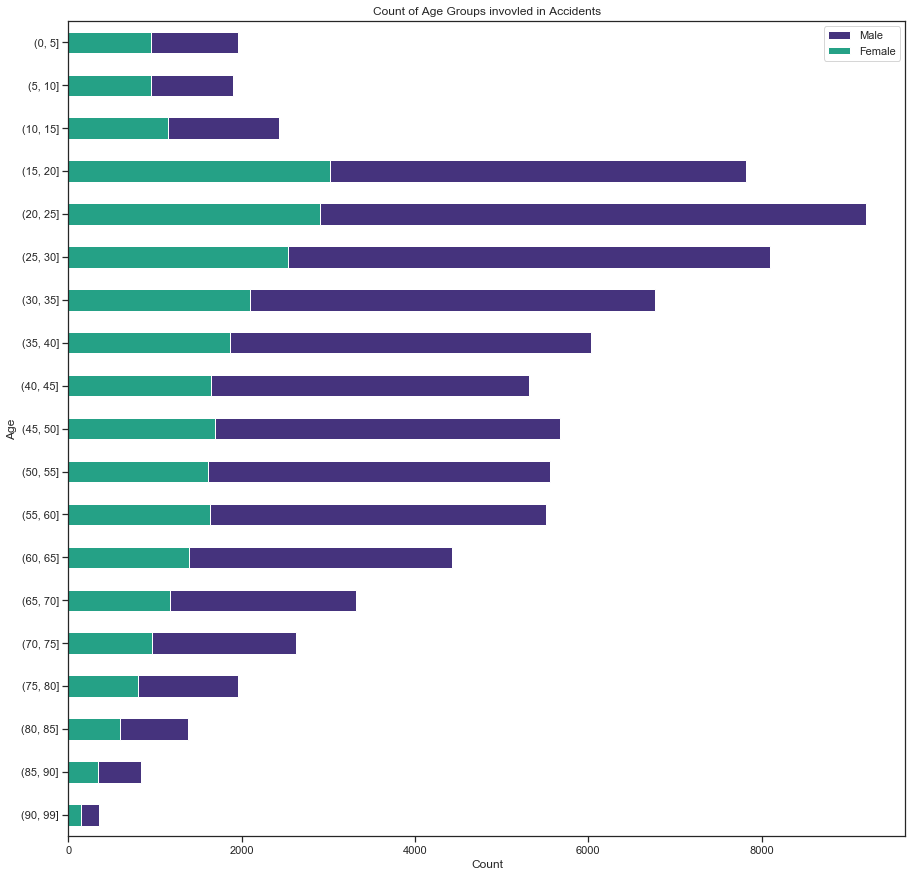

In [822]:
#x_male = df_per[df_per.SEX == 1].age_bins.value_counts().sort_index(ascending=False)
values = df_per.age_bins.value_counts().sort_index(ascending=False)
x_female = df_per[df_per.SEX == 2].age_bins.value_counts().sort_index(ascending=False)
#color1 = [COLOR_MAP[l] for l in range(len(x))]
fig, ax = plt.subplots(figsize=(15,15))
values.plot('barh', label = 'Male', color = COLOR_MAP[1])
x_female.plot('barh', label = 'Female', color = COLOR_MAP[5])
plt.xlabel('Count')
plt.ylabel('Age')
plt.title('Count of Age Groups invovled in Accidents')
plt.legend()
plt.savefig('Plots/age_groups.png')
plt.show()

In [823]:
drinkings = df_per.DRINKING.unique()
drinkings

array([0, 9, 8, 1], dtype=int64)

In [824]:
def change(drinking):
    if drinking == 0:
        drinking = 'No'
    if drinking == 1:
        drinking = 'Yes'
    if drinking == 8:
        drinking = 'Not Reported'
    if drinking == 9:
        drinking = 'Unknown'
    return drinking

df_per['DRINKING_LVL'] = df_per.DRINKING.apply(change)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


In [825]:
df_per.DRINKING.unique()

array([0, 9, 8, 1], dtype=int64)

In [826]:
avg_inj = []
for i in drinkings:
    avg_inj.append(int(df_per[df_per['DRINKING'] == i].INJ_SEV.mean()))

In [829]:
ax.savefig?

Object `ax.savefig` not found.


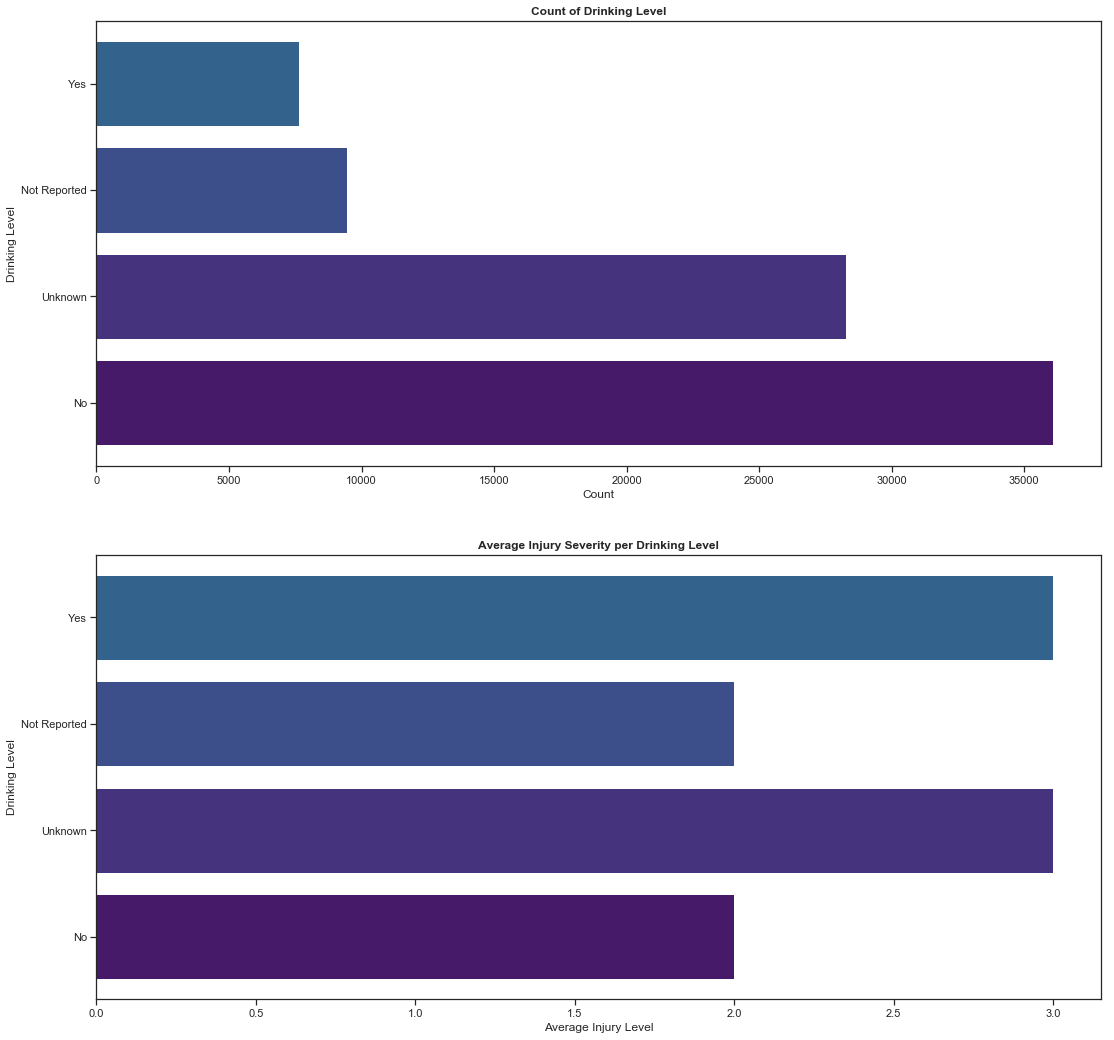

In [832]:
x = df_per.DRINKING_LVL.value_counts()
color1 = [COLOR_MAP[l] for l in range(len(x))]
fig, ax = plt.subplots(nrows = 2, ncols = 1, figsize=(18,18))
fig.subplots_adjust(hspace = 0.2, wspace=0.70)
ax[0].barh(df_per.DRINKING_LVL.unique(), x, color = color1)
ax[0].set_xlabel('Count')
ax[0].set_ylabel('Drinking Level')
ax[0].set_title('Count of Drinking Level', fontweight='bold')

ax[1].barh(df_per.DRINKING_LVL.unique(), avg_inj, color = color1)
ax[1].set_xlabel('Average Injury Level')
ax[1].set_ylabel('Drinking Level')
ax[1].set_title('Average Injury Severity per Drinking Level', fontweight='bold')
plt.savefig('Plots/drinkings3.png')
plt.show()

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: `Series.plot()` should not be called with positional arguments, only keyword arguments. The order of positional arguments will change in the future. Use `Series.plot(kind='barh')` instead of `Series.plot('barh',)`.
  after removing the cwd from sys.path.


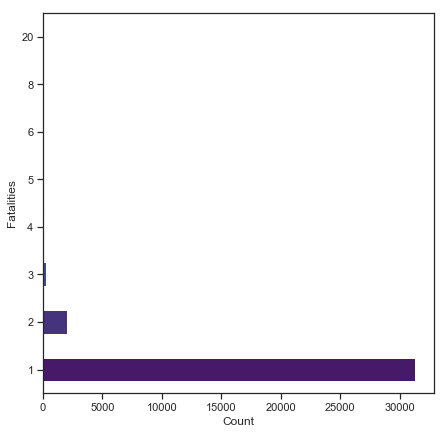

In [835]:
x = df_acc.FATALS.value_counts().sort_index(ascending=True)
color1 = [COLOR_MAP[l] for l in range(len(x))]
fig, ax = plt.subplots(figsize=(7,7))
x.plot('barh', color=color1)
plt.xlabel('Count')
plt.ylabel('Fatalities')
plt.savefig('Plots/fatalities.png')
plt.show()

In [742]:
num_of_drunks = df_acc['DRUNK_DR'].unique()
num_of_drunks

array([0, 1, 2, 3, 4], dtype=int64)

In [743]:
num_of_peds = df_acc['PEDS'].unique()
num_of_peds

array([ 0,  1,  2,  3,  4,  6,  8,  5,  9,  7, 10], dtype=int64)

In [744]:
avg_fat = np.zeros(len(num_of_drunks))
avg_ped = np.zeros(len(num_of_drunks))
avg_hour = np.zeros(len(num_of_drunks))
for i in num_of_drunks:
    avg_fat[i] = df_acc[df_acc['DRUNK_DR'] == i].FATALS.mean()
    avg_ped[i] = df_acc[df_acc['DRUNK_DR'] == i].PEDS.mean()
    avg_hour[i] = df_acc[df_acc['DRUNK_DR'] == i].HOUR.mean()

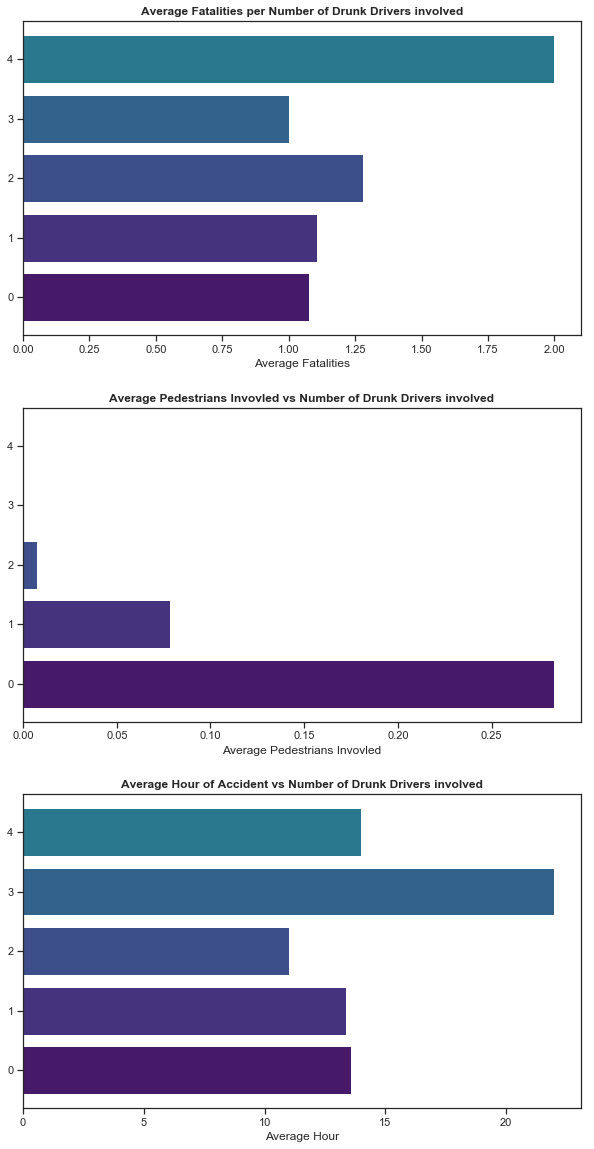

In [745]:
color1 = [COLOR_MAP[l] for l in range(len(num_of_drunks))]

fig, ax = plt.subplots(nrows=3,ncols=1, figsize=(10,20))
fig.subplots_adjust(hspace = 0.23, wspace=0.70)
ax[0].barh(num_of_drunks, avg_fat, color = color1)
ax[0].set_xlabel('Average Fatalities')
ax[0].set_title('Average Fatalities per Number of Drunk Drivers involved',fontweight='bold')

ax[1].barh(num_of_drunks, avg_ped, color = color1)
ax[1].set_xlabel('Average Pedestrians Invovled')
ax[1].set_title('Average Pedestrians Invovled vs Number of Drunk Drivers involved',fontweight='bold')

ax[2].barh(num_of_drunks, avg_hour, color = color1)
ax[2].set_xlabel('Average Hour')
ax[2].set_title('Average Hour of Accident vs Number of Drunk Drivers involved',fontweight='bold')
plt.savefig('Plots/drinkings3.png')
plt.show()

In [746]:
df_per.columns

Index(['ST_CASE', 'VEH_NO', 'PER_NO', 'HOUR', 'MAKE', 'MAK_MOD', 'BODY_TYP',
       'MOD_YEAR', 'AGE', 'SEX', 'INJ_SEV', 'REST_USE', 'EJECTION', 'DRINKING',
       'ALC_DET', 'DRUGS', 'DRUG_DET', 'INJ_lvl', 'DRINKING_LVL'],
      dtype='object')

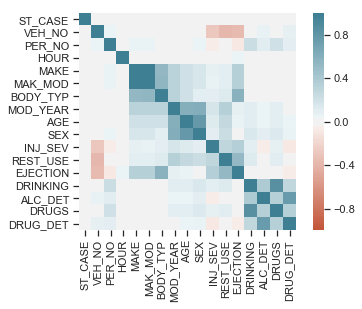

In [747]:
sns.set(style="ticks")
corr = df_per.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)

In [748]:
df_per.columns

Index(['ST_CASE', 'VEH_NO', 'PER_NO', 'HOUR', 'MAKE', 'MAK_MOD', 'BODY_TYP',
       'MOD_YEAR', 'AGE', 'SEX', 'INJ_SEV', 'REST_USE', 'EJECTION', 'DRINKING',
       'ALC_DET', 'DRUGS', 'DRUG_DET', 'INJ_lvl', 'DRINKING_LVL'],
      dtype='object')

In [749]:
df_acc.columns

Index(['ST_CASE', 'VE_TOTAL', 'PEDS', 'PERSONS', 'HOUR', 'WRK_ZONE',
       'REL_ROAD', 'LGT_COND', 'WEATHER', 'SCH_BUS', 'FATALS', 'DRUNK_DR'],
      dtype='object')

In [750]:
df_vehicle = pd.read_csv('VEHICLE.csv', encoding = 'latin1')
df_vehicle.columns

D:\Anaconda\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (36,37,104) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Index(['STATE', 'ST_CASE', 'VEH_NO', 'VE_FORMS', 'NUMOCCS', 'DAY', 'MONTH',
       'HOUR', 'MINUTE', 'HARM_EV',
       ...
       'P_CRASH2', 'P_CRASH3', 'PCRASH4', 'PCRASH5', 'ACC_TYPE', 'TRLR1VIN',
       'TRLR2VIN', 'TRLR3VIN', 'DEATHS', 'DR_DRINK'],
      dtype='object', length=107)

In [751]:
df_per

,ST_CASE,VEH_NO,PER_NO,HOUR,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,AGE,SEX,INJ_SEV,REST_USE,EJECTION,DRINKING,ALC_DET,DRUGS,DRUG_DET,INJ_lvl,DRINKING_LVL
0,10001,1,1,6,82.0,82881.0,66.0,2018.0,55,1,4,20,2,0,9,0,8,Fatal Injury,No
1,10002,1,1,0,58.0,58037.0,4.0,9999.0,24,1,4,20,1,9,9,9,8,Fatal Injury,Unknown
2,10002,1,2,0,58.0,58037.0,4.0,9999.0,24,1,4,3,0,8,9,8,8,Fatal Injury,Not Reported
3,10003,1,1,22,63.0,63402.0,14.0,2008.0,37,2,4,20,0,0,9,9,8,Fatal Injury,No
4,10003,2,1,22,7.0,7881.0,61.0,2001.0,36,1,2,20,0,0,9,0,8,Suspected Minor Injury,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
83621,560099,1,1,18,34.0,34034.0,4.0,1994.0,61,1,4,20,2,9,9,9,8,Fatal Injury,Unknown
83622,560100,1,1,13,20.0,20036.0,2.0,2002.0,34,2,4,20,1,1,9,1,8,Fatal Injury,Yes
83623,560100,1,2,13,20.0,20036.0,2.0,2002.0,36,1,2,20,0,8,9,8,8,Suspected Minor Injury,Not Reported
83624,560101,1,1,18,20.0,20401.0,14.0,1992.0,40,1,4,20,1,1,9,9,8,Fatal Injury,Yes


In [752]:
df_veh = df_vehicle[['ST_CASE','VEH_NO','VE_FORMS','MAKE','BODY_TYP','MOD_YEAR','GVWR','VSURCOND','ROLLOVER']]
df_veh

,ST_CASE,VEH_NO,VE_FORMS,MAKE,BODY_TYP,MOD_YEAR,GVWR,VSURCOND,ROLLOVER
0,10001,1,1,82,66,2018,3,1,1
1,10002,1,1,58,4,9999,0,2,0
2,10003,1,2,63,14,2008,0,2,0
3,10003,2,2,7,61,2001,2,2,0
4,10004,1,1,49,34,2004,0,1,0
...,...,...,...,...,...,...,...,...,...
51867,560098,2,2,20,34,2014,0,4,0
51868,560099,1,1,34,4,1994,0,4,1
51869,560100,1,1,20,2,2002,0,1,9
51870,560101,1,2,20,14,1992,0,1,1


In [753]:
final = df_per.merge(df_veh)
final.head(5)

,ST_CASE,VEH_NO,PER_NO,HOUR,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,AGE,SEX,...,DRINKING,ALC_DET,DRUGS,DRUG_DET,INJ_lvl,DRINKING_LVL,VE_FORMS,GVWR,VSURCOND,ROLLOVER
0,10001,1,1,6,82.0,82881.0,66.0,2018.0,55,1,...,0,9,0,8,Fatal Injury,No,1,3,1,1
1,10002,1,1,0,58.0,58037.0,4.0,9999.0,24,1,...,9,9,9,8,Fatal Injury,Unknown,1,0,2,0
2,10002,1,2,0,58.0,58037.0,4.0,9999.0,24,1,...,8,9,8,8,Fatal Injury,Not Reported,1,0,2,0
3,10003,1,1,22,63.0,63402.0,14.0,2008.0,37,2,...,0,9,9,8,Fatal Injury,No,2,0,2,0
4,10003,2,1,22,7.0,7881.0,61.0,2001.0,36,1,...,0,9,0,8,Suspected Minor Injury,No,2,2,2,0


In [754]:
final = final.drop(['SEX','DRUG_DET','ALC_DET','DRINKING_LVL','INJ_lvl'],axis=1)
final.head(5)

,ST_CASE,VEH_NO,PER_NO,HOUR,MAKE,MAK_MOD,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,REST_USE,EJECTION,DRINKING,DRUGS,VE_FORMS,GVWR,VSURCOND,ROLLOVER
0,10001,1,1,6,82.0,82881.0,66.0,2018.0,55,4,20,2,0,0,1,3,1,1
1,10002,1,1,0,58.0,58037.0,4.0,9999.0,24,4,20,1,9,9,1,0,2,0
2,10002,1,2,0,58.0,58037.0,4.0,9999.0,24,4,3,0,8,8,1,0,2,0
3,10003,1,1,22,63.0,63402.0,14.0,2008.0,37,4,20,0,0,9,2,0,2,0
4,10003,2,1,22,7.0,7881.0,61.0,2001.0,36,2,20,0,0,0,2,2,2,0


In [755]:
final.GVWR.value_counts()
#68k cases not applicable

0    68345
3     4858
2     1943
9      138
8       84
1       68
Name: GVWR, dtype: int64

In [756]:
final.ROLLOVER.value_counts()
#Rollover is always reported

0    62865
1     9830
2     2017
9      724
Name: ROLLOVER, dtype: int64

In [757]:
final.DRUGS.value_counts()
#half the data is missing drug data

8    32509
0    31401
9     7831
1     3695
Name: DRUGS, dtype: int64

In [758]:
final.REST_USE.value_counts()
#extracting whether seatbealt was used or not

3     42755
20    15930
99     6003
17     2533
19     1956
5      1245
98     1218
8       779
4       750
10      638
2       469
12      277
1       277
11      211
16      173
29      162
97       60
Name: REST_USE, dtype: int64

In [759]:
final = final[(final.REST_USE == 3)|(final.REST_USE == 20)]
final.REST_USE = pd.factorize(final.REST_USE)[0]
final.REST_USE.value_counts()
##extracting whether seatbealt was used or not

1    42755
0    15930
Name: REST_USE, dtype: int64

In [760]:
final.MOD_YEAR.value_counts()

2017.0    3302
2015.0    3258
2005.0    3244
2006.0    3218
2004.0    3179
          ... 
1950.0       1
1947.0       1
1942.0       1
1969.0       1
2020.0       1
Name: MOD_YEAR, Length: 72, dtype: int64

In [761]:
final = final[(final['MOD_YEAR'] != 9999)&(final['MOD_YEAR'] != 9998)]
#removing unkown modyear or unreported

In [762]:
final.DRINKING.value_counts()

0    27811
8    20952
1     4879
9     4874
Name: DRINKING, dtype: int64

In [763]:
final = final.merge(df_acc[['ST_CASE','LGT_COND']])

In [764]:
final = final.drop(['GVWR','DRINKING','DRUGS','MAK_MOD','ST_CASE','VEH_NO','PER_NO'],axis=1)
final

,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,LGT_COND
0,6,82.0,66.0,2018.0,55,4,0,2,1,1,1,4
1,22,63.0,14.0,2008.0,37,4,0,0,2,2,0,2
2,22,7.0,61.0,2001.0,36,2,0,0,2,2,0,2
3,13,49.0,34.0,2004.0,58,0,1,0,1,1,0,1
4,13,49.0,34.0,2004.0,26,4,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
58511,10,20.0,34.0,2014.0,63,4,1,0,2,4,0,1
58512,18,34.0,4.0,1994.0,61,4,0,2,1,4,1,2
58513,13,20.0,2.0,2002.0,34,4,0,1,1,1,9,1
58514,13,20.0,2.0,2002.0,36,2,0,0,1,1,9,1


In [765]:
final.EJECTION.value_counts()

0    52850
1     4333
2     1085
8       91
9       80
3       40
7       37
Name: EJECTION, dtype: int64

In [766]:
final = final[(final['EJECTION'] != 8)&(final['EJECTION'] != 9)&(final['EJECTION'] !=  7)]
#Taking only reported ejection values

In [767]:
final.EJECTION.value_counts()

0    52850
1     4333
2     1085
3       40
Name: EJECTION, dtype: int64

In [768]:
final.VSURCOND.value_counts()

1     47329
2      8116
4       830
3       550
98      479
0       373
10      178
99      155
6       140
11      105
8        41
5        10
7         2
Name: VSURCOND, dtype: int64

In [769]:
final = final[(final['VSURCOND'] != 98)&(final['VSURCOND'] != 99)]
final.VSURCOND.value_counts()

1     47329
2      8116
4       830
3       550
0       373
10      178
6       140
11      105
8        41
5        10
7         2
Name: VSURCOND, dtype: int64

In [770]:
final.to_csv('df_final.csv')

In [771]:
final.to_csv()
final

,HOUR,MAKE,BODY_TYP,MOD_YEAR,AGE,INJ_SEV,REST_USE,EJECTION,VE_FORMS,VSURCOND,ROLLOVER,LGT_COND
0,6,82.0,66.0,2018.0,55,4,0,2,1,1,1,4
1,22,63.0,14.0,2008.0,37,4,0,0,2,2,0,2
2,22,7.0,61.0,2001.0,36,2,0,0,2,2,0,2
3,13,49.0,34.0,2004.0,58,0,1,0,1,1,0,1
4,13,49.0,34.0,2004.0,26,4,0,1,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...
58511,10,20.0,34.0,2014.0,63,4,1,0,2,4,0,1
58512,18,34.0,4.0,1994.0,61,4,0,2,1,4,1,2
58513,13,20.0,2.0,2002.0,34,4,0,1,1,1,9,1
58514,13,20.0,2.0,2002.0,36,2,0,0,1,1,9,1


In [772]:
y = final.INJ_SEV
x = final.drop('INJ_SEV',axis=1)

In [773]:
from sklearn.model_selection import train_test_split
train_x, test_x, train_y, test_y = train_test_split(x, y, test_size = 0.25, random_state = 42)

In [774]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
rf.fit(train_x, train_y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=1000,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [775]:
train_predictions = (rf.predict(train_x)).astype(int)
error = abs(train_predictions - train_y)
train_mse = (np.dot(error, error))/len(error)

test_predictions = (rf.predict(test_x)).astype(int)
error = abs(test_predictions - test_y)
test_mse = (np.dot(error, error))/len(error)
mse = [{'training mse': train_mse,
                     'test mse': test_mse}] 
mse = pd.DataFrame(mse)
mse

,training mse,test mse
0,0.652387,2.370622


In [776]:
#Vehicle dataset for future integration with Rating system
#pd.read_csv('veh.psv', sep = '|').columns